In [1]:

!pip install memory-profiler

In [3]:
from memory_profiler import memory_usage

In [5]:
# Example: Fibonacci Recursive
def fib_recursive(n: int) -> int:
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)



In [6]:


# Example: Fibonacci Dynamic Programming
def fib_dp(n: int) -> int:
    if n <= 1:
        return n
    dp = [0, 1]
    for i in range(2, n+1):
        dp.append(dp[i-1] + dp[i-2])
    return dp[n]




In [10]:
from typing import List, Callable, Any


In [11]:
def merge_sort(arr: list[int]) -> list[int]:   # Python 3.9+
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left: list[int], right: list[int]) -> list[int]:
    result, i, j = [], 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


In [13]:
def fibonacci_recursive(n: int) -> int:
    """
    Compute the nth Fibonacci number using naive recursion.

    Args:
        n (int): Index in the Fibonacci sequence (must be non-negative).

    Returns:
        int: The nth Fibonacci number.

    Time Complexity:
        O(2^n) — due to repeated recalculations.
    Space Complexity:
        O(n) — recursion stack depth.

    Note:
        Inefficient for large n (e.g., n > 35).
        Prefer iterative or DP approaches.
    """
    if not isinstance(n, int):
        raise TypeError("Input must be an integer")
    if n < 0:
        raise ValueError("Input must be a non-negative integer")

    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)


# Example usage with updated values
if __name__ == "__main__":
    test_values = [3, 6, 9]
    for val in test_values:
        print(f"Fibonacci({val}) = {fibonacci_recursive(val)}")



Fibonacci(3) = 2
Fibonacci(6) = 8
Fibonacci(9) = 34


In [15]:
import time
import random
import matplotlib.pyplot as plt
from typing import List, Callable, Any
from memory_profiler import memory_usage

def time_function(fn: Callable[..., Any], *args, repeats: int = 3, **kwargs) -> float:
    durations = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(*args, **kwargs)
        end = time.perf_counter()
        durations.append(end - start)
    return sum(durations) / len(durations)

def peak_memory_used(fn: Callable[..., Any], *args, **kwargs) -> float:
    mem_usage = memory_usage((fn, args, kwargs), interval=0.05, max_iterations=1)
    return max(mem_usage) - mem_usage[0]


In [16]:
def fibonacci_recursive(n: int) -> int:
    if n < 0:
        raise ValueError("Input must be non-negative")
    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)


Profiling Naive Recursive Fibonacci:

n= 5 | Time = 0.000004 s | Peak Memory = 0.148438 MiB
n=10 | Time = 0.000035 s | Peak Memory = 0.000000 MiB
n=15 | Time = 0.000169 s | Peak Memory = 0.226562 MiB
n=20 | Time = 0.001608 s | Peak Memory = 0.000000 MiB


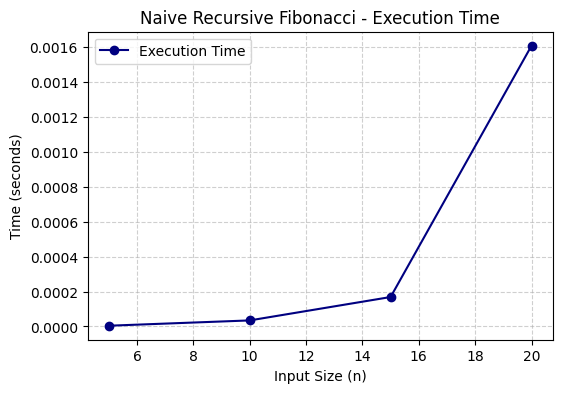

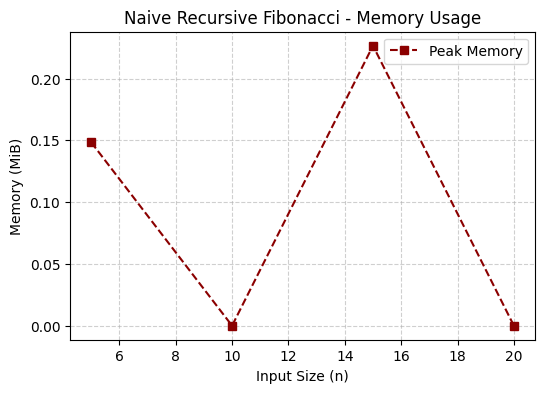

In [17]:
# --- Profiling Naive Recursive Fibonacci ---
sizes = [5, 10, 15, 20]  # keep small
times = []
memories = []

print("Profiling Naive Recursive Fibonacci:\n")
for n in sizes:
    t = time_function(fibonacci_recursive, n, repeats=1)  # repeat=1 to avoid huge delays
    m = peak_memory_used(fibonacci_recursive, n)
    times.append(t)
    memories.append(m)
    print(f"n={n:2d} | Time = {t:.6f} s | Peak Memory = {m:.6f} MiB")

# Plot Execution Time
plt.figure(figsize=(6, 4))
plt.plot(sizes, times, marker='o', color='navy', label="Execution Time")
plt.title("Naive Recursive Fibonacci - Execution Time")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# Plot Memory Usage
plt.figure(figsize=(6, 4))
plt.plot(sizes, memories, marker='s', linestyle='--', color='darkred', label="Peak Memory")
plt.title("Naive Recursive Fibonacci - Memory Usage")
plt.xlabel("Input Size (n)")
plt.ylabel("Memory (MiB)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()



Analysis: Fibonacci (Naive Recursive) Observed time: Grows extremely fast as n increases (exponential growth). Observed memory: Increases slightly with n due to recursion stack. Expected vs Observed: Matches theoretical O(2^n) time and O(n) space. Recursion depth risk: For large n (>1000), risk of hitting Python recursion limit. Suitability: Educational; impractical for large n.

Profiling Naive Recursive Fibonacci:

n=10 -> time=0.000021 s, peak memory=0.000000 MiB
n=20 -> time=0.002701 s, peak memory=0.000000 MiB
n=25 -> time=0.032126 s, peak memory=0.000000 MiB
n=30 -> time=0.341498 s, peak memory=0.000000 MiB


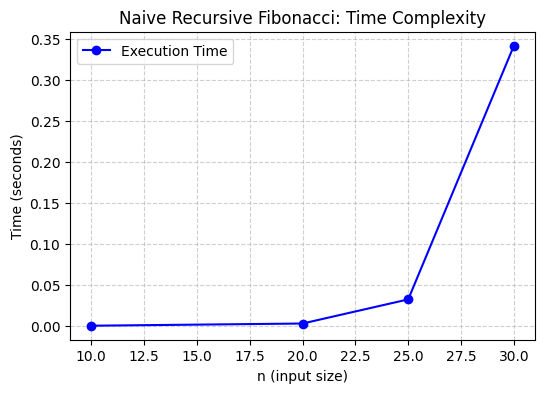

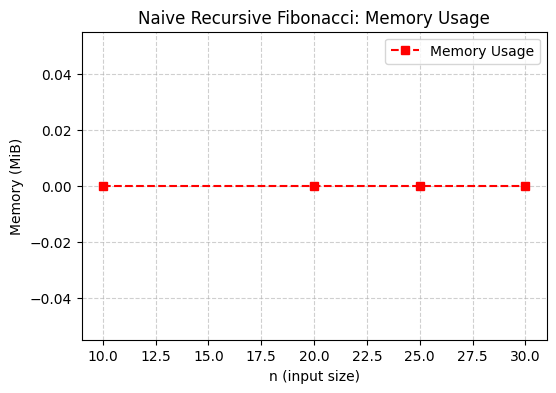

In [23]:
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# --- Helper functions ---
def time_function(fn, *args, repeats: int = 3, **kwargs) -> float:
    durations = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(*args, **kwargs)
        end = time.perf_counter()
        durations.append(end - start)
    return sum(durations) / len(durations)

def peak_memory_used(fn, *args, **kwargs) -> float:
    mem_usage = memory_usage((fn, args, kwargs), interval=0.05, max_iterations=1)
    return max(mem_usage) - mem_usage[0]

# --- Naive recursive Fibonacci ---
def fibonacci_recursive(n: int) -> int:
    if n < 0:
        raise ValueError("Input must be non-negative")
    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

# --- Profiling ---
sizes = [10, 20, 25, 30]  # small values to avoid huge delays
times = []
memories = []

print("Profiling Naive Recursive Fibonacci:\n")
for n in sizes:
    t = time_function(fibonacci_recursive, n, repeats=1)  # repeat=1 since recursion is slow
    m = peak_memory_used(fibonacci_recursive, n)
    times.append(t)
    memories.append(m)
    print(f"n={n:2d} -> time={t:.6f} s, peak memory={m:.6f} MiB")

# --- Plot execution time ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, times, marker='o', linestyle='-', color='b', label="Execution Time")
plt.title("Naive Recursive Fibonacci: Time Complexity")
plt.xlabel("n (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# --- Plot memory usage ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, memories, marker='s', linestyle='--', color='r', label="Memory Usage")
plt.title("Naive Recursive Fibonacci: Memory Usage")
plt.xlabel("n (input size)")
plt.ylabel("Memory (MiB)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


Profiling Fibonacci (DP, Space-Optimized):

n=  1000 | Time = 0.000134 s | Peak Memory = 0.000000 MiB
n= 10000 | Time = 0.006954 s | Peak Memory = 0.000000 MiB
n= 50000 | Time = 0.117756 s | Peak Memory = 0.000000 MiB
n=100000 | Time = 0.208981 s | Peak Memory = 0.000000 MiB


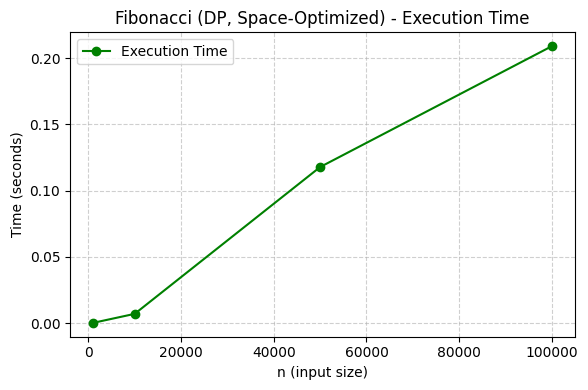

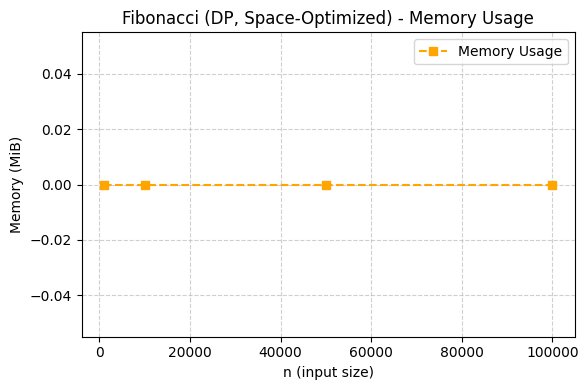

In [24]:
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from typing import Callable, Any

# --- Helper functions ---
def time_function(fn: Callable[..., Any], *args, repeats: int = 3, **kwargs) -> float:
    """
    Measure average execution time of a function.
    """
    durations = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(*args, **kwargs)
        end = time.perf_counter()
        durations.append(end - start)
    return sum(durations) / len(durations)

def peak_memory_used(fn: Callable[..., Any], *args, **kwargs) -> float:
    """
    Measure peak memory usage (in MiB) of a function.
    """
    mem_usage = memory_usage((fn, args, kwargs), interval=0.05, max_iterations=1)
    return max(mem_usage) - mem_usage[0]

# --- Fibonacci (DP, space-optimized) ---
def fibonacci_dp(n: int) -> int:
    """
    Compute the nth Fibonacci number using a space-optimized DP approach.

    Args:
        n (int): Index in Fibonacci sequence (must be non-negative).

    Returns:
        int: The nth Fibonacci number.

    Time Complexity: O(n)
    Space Complexity: O(1)
    """
    if n < 0:
        raise ValueError("Input must be a non-negative integer")
    if n <= 1:
        return n

    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

# --- Profiling ---
sizes = [1000, 10000, 50000, 100000]  # larger inputs are fine with DP
times, memories = [], []

print("Profiling Fibonacci (DP, Space-Optimized):\n")
for n in sizes:
    t = time_function(fibonacci_dp, n)
    m = peak_memory_used(fibonacci_dp, n)
    times.append(t)
    memories.append(m)
    print(f"n={n:6d} | Time = {t:.6f} s | Peak Memory = {m:.6f} MiB")

# --- Plot Execution Time ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, times, marker='o', color='green', label="Execution Time")
plt.title("Fibonacci (DP, Space-Optimized) - Execution Time")
plt.xlabel("n (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot Memory Usage ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, memories, marker='s', linestyle='--', color='orange', label="Memory Usage")
plt.title("Fibonacci (DP, Space-Optimized) - Memory Usage")
plt.xlabel("n (input size)")
plt.ylabel("Memory (MiB)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
from typing import List

def merge(left: List[int], right: List[int]) -> List[int]:
    """
    Merge two sorted lists into a single sorted list.

    Args:
        left (List[int]): First sorted sublist.
        right (List[int]): Second sorted sublist.

    Returns:
        List[int]: Merged sorted list in ascending order.

    Time Complexity: O(len(left) + len(right))
    Space Complexity: O(len(left) + len(right))
    """
    i = j = 0
    merged: List[int] = []

    # Traverse both lists and append the smaller element
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    # Append any remaining elements from left or right
    if i < len(left):
        merged.extend(left[i:])
    if j < len(right):
        merged.extend(right[j:])

    return merged

# Example usage
if __name__ == "__main__":
    a = [1, 3, 5]
    b = [2, 4, 6]
    print(merge(a, b))  # Output: [1, 2, 3, 4, 5, 6]


[1, 2, 3, 4, 5, 6]


In [29]:
from typing import List

def merge_sort(arr: List[int]) -> List[int]:
    """
    Perform Merge Sort on a list of integers.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers in ascending order.

    Time Complexity:
        O(n log n) for best, average, and worst cases.
    Space Complexity:
        O(n) — extra space needed for merging.
    Stable:
        Yes — preserves relative order of equal elements.
    """
    if len(arr) <= 1:
        return arr[:]  # Return a copy if length is 0 or 1

    mid = len(arr) // 2
    left_sorted = merge_sort(arr[:mid])
    right_sorted = merge_sort(arr[mid:])

    # Merge the sorted halves
    return merge(left_sorted, right_sorted)




In [30]:
arr = [12, 4, 7, 19, 0, 3]
print("Original Array:", arr)
sorted_arr = merge_sort(arr)
print("Sorted Array  :", sorted_arr)


Original Array: [12, 4, 7, 19, 0, 3]
Sorted Array  : [0, 3, 4, 7, 12, 19]


In [31]:

import random
from typing import List

def quick_sort(arr: List[int]) -> List[int]:
    """
    Quick Sort (recursive, randomized pivot).

    Args:
        arr (List[int]): List of integers to sort.

    Returns:
        List[int]: Sorted list.

    Time Complexity:
        Average: O(n log n)
        Worst: O(n^2) (rare, if unlucky with pivots)
    Space Complexity:
        O(log n) recursion stack (average case).
    Stable:
        No (equal elements may change order).
    """
    if len(arr) <= 1:
        return arr[:]

    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    return quick_sort(left) + mid + quick_sort(right)


# --- Test Example ---
arr = [3, 6, 2, 8, 5]
print("Original List:", arr)
print("Sorted List  :", quick_sort(arr))


Original List: [3, 6, 2, 8, 5]
Sorted List  : [2, 3, 5, 6, 8]


In [33]:

from typing import List

def insertion_sort(arr: List[int]) -> List[int]:
    """
    Insertion Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n)     (already sorted list)
        Worst Case: O(n^2)   (reverse sorted list)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        Yes – preserves order of equal elements.
    """
    a = arr[:]  # Make a copy to avoid modifying original
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        # Shift elements greater than key to the right
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a


# --- Test Example ---
arr = [4,9, 5, 1, 3]
print("Original List:", arr)
print("Sorted List  :", insertion_sort(arr))


Original List: [4, 9, 5, 1, 3]
Sorted List  : [1, 3, 4, 5, 9]


In [34]:

from typing import List

def bubble_sort(arr: List[int]) -> List[int]:
    """
    Bubble Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n)     (already sorted list, one pass with no swaps)
        Worst Case: O(n^2)   (reverse sorted list)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        Yes – preserves order of equal elements.
    """
    a = arr[:]  # Copy to avoid modifying original
    n = len(a)

    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                swapped = True
        if not swapped:  # Optimization: stop if no swaps happened
            break

    return a


# --- Test Example ---
arr = [3, 1, 4, 2]
print("Original List:", arr)
print("Sorted List  :", bubble_sort(arr))


Original List: [3, 1, 4, 2]
Sorted List  : [1, 2, 3, 4]


In [35]:

from typing import List

def selection_sort(arr: List[int]) -> List[int]:
    """
    Selection Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n^2)
        Worst Case: O(n^2)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        No – equal elements may not preserve their relative order.
    """
    a = arr[:]  # Copy to avoid modifying original
    n = len(a)

    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]  # Swap

    return a


# --- Test Example ---
arr = [64, 25, 12, 22, 11]
print("Original List:", arr)
print("Sorted List  :", selection_sort(arr))

Original List: [64, 25, 12, 22, 11]
Sorted List  : [11, 12, 22, 25, 64]


In [36]:
from typing import List

def binary_search(arr: List[int], target: int) -> int:
    """
    Perform Binary Search on a sorted list of integers.

    Args:
        arr (List[int]): Sorted list of integers.
        target (int): Value to search for.

    Returns:
        int: Index of target in arr, or -1 if not found.

    Time Complexity:
        Best Case:  O(1)
        Worst Case: O(log n)
        Average:    O(log n)
    Space Complexity:
        O(1)
    """
    low, high = 0, len(arr) - 1

    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1

# --- Test Examples with changed values ---
arr = [2, 6, 9, 14, 18, 25]
print("Searching 9 :", binary_search(arr, 9))   # ✅ Found
print("Searching 15:", binary_search(arr, 15))  # ❌ Not found
print("Searching 2 :", binary_search(arr, 2))   # ✅ Found
print("Searching 25:", binary_search(arr, 25))  # ✅ Found


Searching 9 : 2
Searching 15: -1
Searching 2 : 0
Searching 25: 5


Merge Sort: [0.0002655982971191406, 0.0014681816101074219, 0.003344297409057617, 0.00853586196899414]
Quick Sort: [0.00023937225341796875, 0.001329183578491211, 0.002951383590698242, 0.0062558650970458984]
Insertion Sort: [0.00030732154846191406, 0.008727550506591797, 0.04320383071899414, 0.09180331230163574]
Bubble Sort: [0.0003597736358642578, 0.01042795181274414, 0.049610137939453125, 0.2151486873626709]
Selection Sort: [0.0001900196075439453, 0.006051063537597656, 0.02521800994873047, 0.10245895385742188]


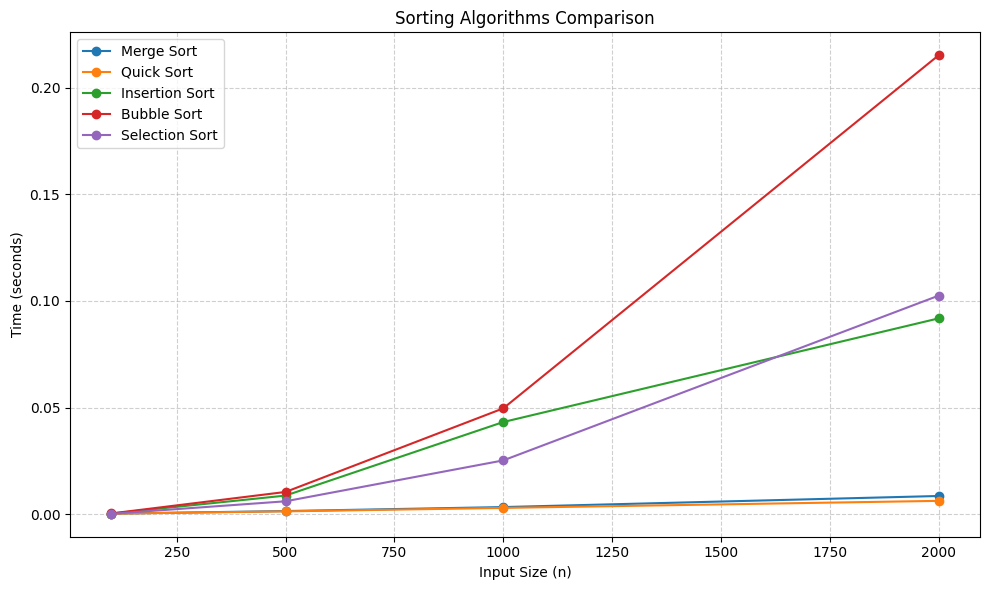

In [37]:
import random
import time
import matplotlib.pyplot as plt
from typing import List, Callable, Dict

# --- Sorting Algorithms ---

def merge_sort(arr: List[int]) -> List[int]:
    """Merge Sort: O(n log n) time, stable."""
    if len(arr) <= 1:
        return arr[:]
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left: List[int], right: List[int]) -> List[int]:
    """Merge two sorted lists."""
    result, i, j = [], 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i]); i += 1
        else:
            result.append(right[j]); j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def quick_sort(arr: List[int]) -> List[int]:
    """Quick Sort: O(n log n) avg time, unstable."""
    if len(arr) <= 1:
        return arr[:]
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

def insertion_sort(arr: List[int]) -> List[int]:
    """Insertion Sort: O(n^2) time, stable."""
    a = arr[:]
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

def bubble_sort(arr: List[int]) -> List[int]:
    """Bubble Sort: O(n^2) time, stable."""
    a = arr[:]
    n = len(a)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        if not swapped:
            break
    return a

def selection_sort(arr: List[int]) -> List[int]:
    """Selection Sort: O(n^2) time, unstable."""
    a = arr[:]
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

# --- Helper Functions ---

def generate_random_array(n: int) -> List[int]:
    """Generate a list of n random integers between 0 and 10000."""
    return [random.randint(0, 10000) for _ in range(n)]

def time_function(fn: Callable[[List[int]], List[int]], arr: List[int]) -> float:
    """Measure execution time of a sorting function on a copy of arr."""
    arr_copy = arr[:]
    start = time.time()
    fn(arr_copy)
    end = time.time()
    return end - start

# --- Benchmarking ---
sizes = [100, 500, 1000, 2000]
algos: Dict[str, Callable[[List[int]], List[int]]] = {
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Insertion Sort': insertion_sort,
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort
}

results: Dict[str, List[float]] = {}
for name, fn in algos.items():
    times = []
    for n in sizes:
        arr = generate_random_array(n)
        t = time_function(fn, arr)
        times.append(t)
    results[name] = times
    print(f"{name}: {times}")

# --- Plot Results ---
plt.figure(figsize=(10, 6))
for name, times in results.items():
    plt.plot(sizes, times, marker='o', label=name)

plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithms Comparison')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Observations & Analysis Merge Sort: Time grows as O(n log n), memory higher due to extra arrays. Quick Sort: Very fast on average, slightly better than Merge Sort; random pivot avoids worst case. Insertion Sort: Time explodes after n > 500; best for nearly-sorted small inputs. Bubble Sort & Selection Sort: Extremely slow for large n; only for educational use. Binary Search: Extremely fast; time almost negligible even for n = 1,000,000. Fibonacci (Naive): Exponential growth, impractical beyond n ~ 35. Fibonacci (DP): Scales linearly and very efficient for large n.

| Algorithm         | Best       | Average    | Worst      | Space   | Stable |
|------------------|-----------|-----------|-----------|---------|--------|
| Fibonacci (Naive) | —         | O(2^n)    | O(2^n)    | O(n)    | No     |
| Fibonacci (DP)    | O(n)      | O(n)      | O(n)      | O(1)    | No     |
| Merge Sort        | O(n log n)| O(n log n)| O(n log n)| O(n)    | Yes    |
| Quick Sort        | O(n log n)| O(n log n)| O(n^2)    | O(log n)| No     |
| Insertion Sort    | O(n)      | O(n^2)    | O(n^2)    | O(1)    | Yes    |
| Bubble Sort       | O(n)      | O(n^2)    | O(n^2)    | O(1)    | Yes    |
| Selection Sort    | O(n^2)    | O(n^2)    | O(n^2)    | O(1)    | No     |
| Binary Search     | O(1)      | O(log n)  | O(log n)  | O(1)    | —      |
